In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv("madfhantr.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = df.dropna()
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
# Define features (X) and target (y)
X = df[['ApplicantIncome', 'Credit_History', 'LoanAmount'] ]
y = df['Loan_Status']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [7]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))



Accuracy: 0.7847222222222222
Classification Report:
               precision    recall  f1-score   support

           N       0.93      0.32      0.47        44
           Y       0.77      0.99      0.86       100

    accuracy                           0.78       144
   macro avg       0.85      0.65      0.67       144
weighted avg       0.82      0.78      0.75       144



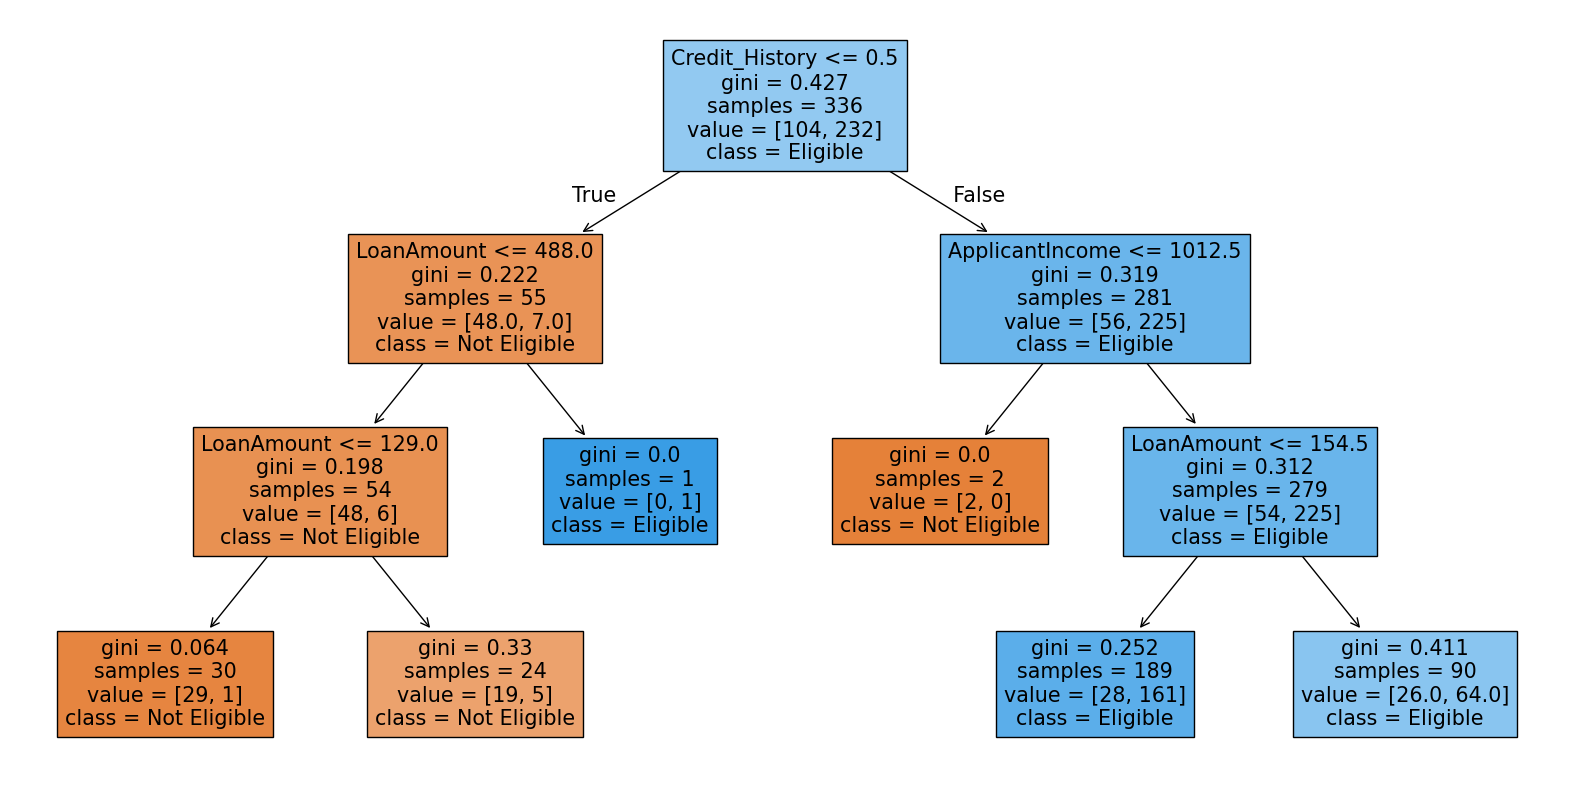

In [8]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Eligible', 'Eligible'], filled=True)
plt.show()
